# Subreddit similarity

In [1]:
import pyreadr
import pandas as pd
import csv

In [2]:
result = pyreadr.read_r('subredsimdata.rdata')
df_similarity = pd.DataFrame(result['subsimmat'])

In [3]:
df_similarity.sample(10)

,1200isplenty,3amjokes,3Dprinting,3dsFCswap,3dshacks,49ers,4PanelCringe,4x4,60fpsporn,7daystodie,...,ynab,yoga,Yogscast,youdontsurf,YouShouldKnow,youtube,youtubehaiku,youtubers,yugioh,zelda
lido,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
phoenixmasterrace,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
AudioHaven,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
ArgEntos,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
TyrantUnleashed,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
olympiclive,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,3.623310,0.0,0.0,0.000000
sotah,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
TTIP,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
Fidlar,0.0,0.0,0.0,0.0,0.000000,2.694993,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,2.135233,0.0,0.0,0.000000
battlefront,0.0,0.0,0.0,0.0,0.524091,0.149620,0.391434,0.0,0.0,0.078988,...,0.0,0.0,0.629616,0.0,0.0,0.286101,0.075368,0.0,0.0,0.257911


In [4]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# calculate cosine similarity matrix
cosine_sim = cosine_similarity(df_similarity, df_similarity)

In [5]:
# construct a reverse map of indices and subreddit names
indices = pd.Series(df_similarity.index)

# Function that takes in subreddit name as input and outputs most similar subreddits
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the subreddit that matches the title
    idx = indices[indices == title].index[0]

    # Get the pairwsie similarity scores of all subreddits with that subreddit
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the subreddits based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar subreddits
    sim_scores = sim_scores[1:11]

    # Get the subreddit indices
    subreddit_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar subreddits
    return indices.iloc[subreddit_indices]

get_recommendations('drunknosleep')

18079              HaikuSleep
35895              Scandalist
1396         almanacofhorrors
47316                   Zchxz
1397        almanacofmypoetry
9491            crimsonwrites
5989      briefmacabrestories
6901     CarMechanicSimulator
10675              decolonial
9455            CrescentAllen
dtype: object

In [6]:
# function that takes two subreddit and return their similarity score
def get_similarity_score(sub1, sub2):
    idx1 = indices[indices == sub1].index[0]
    idx2 = indices[indices == sub2].index[0]
    return cosine_sim[idx1][idx2]

get_similarity_score('drunknosleep', 'nosleep')

0.2030608664047306

In [23]:
# plot 2D of subreddit clustering based on similarity score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# get 2D embedding of subreddit similarity
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(df_similarity.sample(1000))

# remove outliers
tsne_results = tsne_results[tsne_results[:,0] < 100]
tsne_results = tsne_results[tsne_results[:,1] < 100]


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.000980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.793488
[t-SNE] KL divergence after 300 iterations: 2.086564


/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


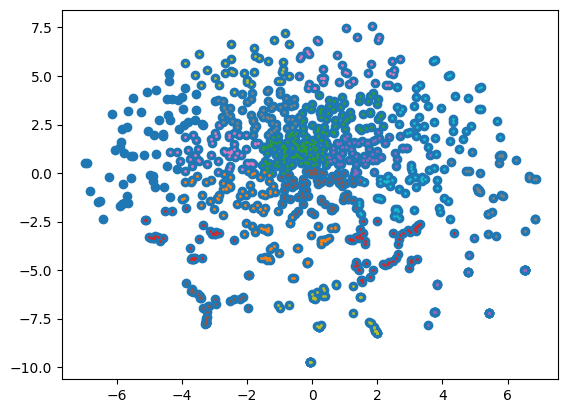

In [26]:
# k means clustering
from sklearn.cluster import KMeans

# get k means clustering
# find the best k
from sklearn.metrics import silhouette_score
import numpy as np


# get k means clustering
kmeans = KMeans(n_clusters=20, random_state=0).fit(tsne_results)

# plot clustering result, cluster are plotted as circonference
plt.scatter(tsne_results[:,0], tsne_results[:,1])
# plot cluster region  
for i in range(20):
    plt.scatter(tsne_results[kmeans.labels_ == i,0], tsne_results[kmeans.labels_ == i,1], s=1)
plt.show()